In [39]:
%load_ext autoreload
%autoreload 2

import sys
import os 
    
if not getattr(sys, "_src_path_added", False):
    src_path = os.path.abspath(os.path.join(os.getcwd(), ".."))
    if src_path not in sys.path:
        sys.path.insert(0, src_path)
    sys._src_path_added = True 

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [40]:
from SGA.SGA import *
from SGA.SGAParts import *
from SGA.SGAInstance import *
import statistics

from ProblemDef import FirefighterProblem
from Displayer import Displayer

/home/jakub/.local/lib/python3.10/site-packages/networkx/readwrite/json_graph/node_link.py:287: FutureWarning: 
The default value will be changed to `edges="edges" in NetworkX 3.6.

To make this warning go away, explicitly set the edges kwarg, e.g.:

  nx.node_link_graph(data, edges="links") to preserve current behavior, or
  nx.node_link_graph(data, edges="edges") for forward compatibility.
  warnings.warn(


787


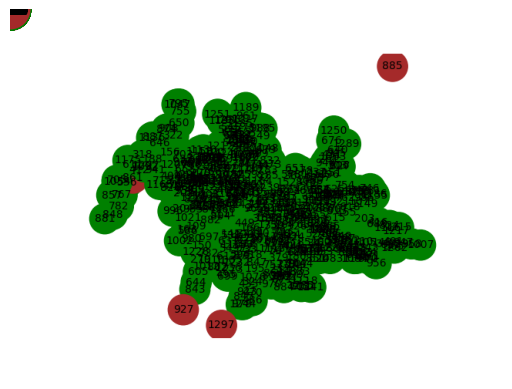

In [57]:
instance = SGAInstance("../problems/p6.json",
    populationInitializer= basicPI,
    populationSize = 100,
    generationsNumber = 100,
    parentsSelector = basicParentsSelector,
    crossover = basicCrossover,
    mutationProb = 0.7,
    mutator = basicMutator,
    fixer = basicFixer,
    evaluator = basicEvaluator)


firemans = [7,9,11]
print(instance._evaluator(fenotypeToGenotype(firemans, instance.problem.graph.number_of_nodes()), instance.problem))
disp = Displayer()
instance.problem.visualize_fire_without_burned(disp, firemans, output_path="gif6.gif")
#instance.problem.visualize_fire_without_burned(disp, firemans)


In [58]:
instance.mutator = noMutator

res1 = []
N=30

for i in range(N):
    burned = instance._evaluator(fenotypeToGenotype(SGA(instance), instance.problem.graph.number_of_nodes()), instance.problem)
    res1.append(burned)

print("noMutator", statistics.fmean(res1))

instance.mutator = basicMutator

res2 = []

for i in range(N):
    burned = instance._evaluator(fenotypeToGenotype(SGA(instance), instance.problem.graph.number_of_nodes()), instance.problem)
    res2.append(burned)

print("basicMutator", statistics.fmean(res2))

instance.mutator = neighbourMutator

res3 = []

for i in range(N):
    burned = instance._evaluator(fenotypeToGenotype(SGA(instance), instance.problem.graph.number_of_nodes()), instance.problem)
    res3.append(burned)

print("neighbourMutator", statistics.fmean(res3))

instance.mutator = mixedMutator

res4 = []

for i in range(N):
    burned = instance._evaluator(fenotypeToGenotype(SGA(instance), instance.problem.graph.number_of_nodes()), instance.problem)
    res4.append(burned)

print("mixedMutator", statistics.fmean(res4))


1031
[2, 40, 181]
1196
[17, 35, 847]
1045
[30, 731, 1254]
1055
[2, 568, 1094]
1159
[18, 530, 781]
1181
[29, 401, 1232]
1053
[2, 88, 346]
1045
[30, 869, 1226]
1043
[26, 497, 995]
1044
[30, 696, 738]
1125
[18, 53, 1166]
1126
[41, 398, 1265]
1044
[26, 498, 1136]
1142
[18, 124, 322]
1126
[41, 525, 949]
1147
[15, 644, 1232]
1038
[26, 456, 467]
1040
[30, 232, 855]
1043
[26, 489, 1048]
1125
[41, 761, 791]
1160
[18, 490, 1007]
1136
[18, 156, 586]
1116
[41, 291, 730]
1045
[26, 134, 1249]
1074
[3, 28, 73]
1055
[2, 672, 1018]
1142
[15, 494, 548]
1246
[114, 168, 543]
1146
[15, 553, 1131]
1051
[2, 331, 529]
noMutator 1099.3
1038
[30, 137, 824]
1026
[30, 145, 425]
1142
[15, 534, 1191]
1045
[2, 394, 757]
1053
[2, 819, 865]
1124
[41, 180, 771]
1144
[45, 394, 1005]
1055
[2, 837, 1009]
1146
[9, 15, 1159]
1019
[30, 48, 373]
1109
[41, 331, 1076]
1180
[29, 34, 590]
1047
[2, 148, 285]
1190
[6, 216, 1076]
1045
[26, 610, 1235]
1136
[28, 338, 970]
1120
[41, 119, 648]
1141
[12, 28, 311]
1158
[18, 463, 642]
1147

In [60]:
print("noMutator", statistics.fmean(res1), " " ,min(res1))
print("basicMutator", statistics.fmean(res2)," " ,min(res2))
print("neighbourMutator", statistics.fmean(res3)," " ,min(res3))
print("mixedMutator", statistics.fmean(res4)," " ,min(res4))

noMutator 1099.3   1031
basicMutator 1118.1333333333334   1019
neighbourMutator 1094.2333333333333   1032
mixedMutator 1088.9333333333334   1024
